In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("train.csv", index_col=0)
data.head()

,doc_id,token_index,token,trailing_space,label
0,7,0,Design,True,O
1,7,1,Thinking,True,O
2,7,2,for,True,O
3,7,3,innovation,True,O
4,7,4,reflexion,False,O


c:\Users\Shiyu Wu\envs\si670\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shiyu Wu\AppData\Local\Temp\ipykernel_18808\1765234849.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.histplot(data=total_token, kde=True, palette="Set2")
c:\Users\Shiyu Wu\envs\si670\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Doc Count')

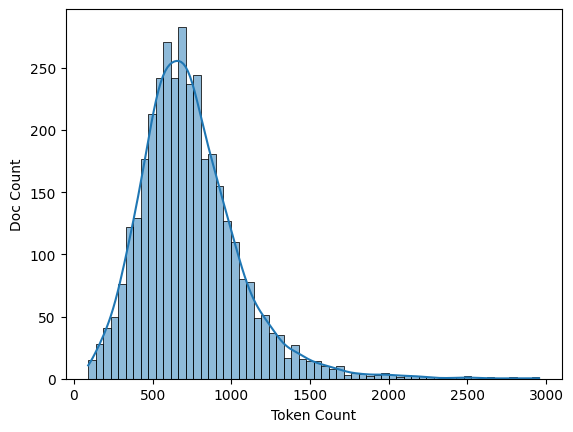

In [14]:
total_token = list(data.groupby(['doc_id']).count()['token_index'])

fig = sns.histplot(data=total_token, kde=True)
fig.set_xlabel('Token Count')
fig.set_ylabel('Doc Count')

In [29]:
labels = list(data['label'].unique())

props = []

for label in labels:
    num = len(data[data['label'] == label])
    props.append((label, num / len(data)))

props.sort(key=lambda pair: pair[1], reverse=True)
props

[('O', 0.9992079316397353),
 ('B-NAME_STUDENT', 0.0003905936347870721),
 ('I-NAME_STUDENT', 0.00032230541045350137),
 ('B-URL_PERSONAL', 2.8891171833433765e-05),
 ('B-ID_NUM', 2.4388651547703828e-05),
 ('B-EMAIL', 1.1256300714324844e-05),
 ('I-PHONE_NUM', 5.628150357162422e-06),
 ('I-STREET_ADDRESS', 3.752100238108281e-06),
 ('B-USERNAME', 2.251260142864969e-06),
 ('B-PHONE_NUM', 2.251260142864969e-06),
 ('I-URL_PERSONAL', 3.752100238108281e-07),
 ('B-STREET_ADDRESS', 3.752100238108281e-07)]

In [57]:
sum([prop[1] for prop in props[1:]])

0.0007920683602646579

In [56]:
sum(total_token) / len(total_token)

738.8893817576934

c:\Users\Shiyu Wu\envs\si670\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shiyu Wu\envs\si670\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shiyu Wu\envs\si670\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Shiyu Wu\envs\si670\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.

Text(0.5, 0, 'Labels')

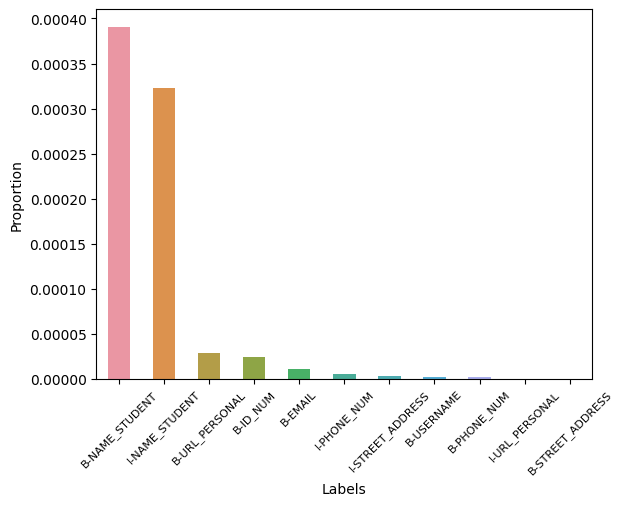

In [54]:
fig = sns.barplot(x=[prop[0] for prop in props[1:]], y=[prop[1] for prop in props[1:]], width=0.5)
plt.xticks(rotation=45, fontsize=8)
fig.set_ylabel('Proportion')
fig.set_xlabel('Labels')

In [75]:
mat1 = [[     0 ,  0,   0,  0,     0,  0,   0,  0,  0,0
  ,   0,   0],
 [   0,  14 ,  0,   0,  0,     0,  0,   2,  0,  0
  ,   0,   0],
 [   0,   0 ,  0,   0,  0,     0,  0,   0,  0,  0
  ,   0,   0],
 [   0,   0 ,  0, 200,  0,     0,  0,   0,  0,  0
  ,   1,   0],
 [   0,   0 ,  0,   0,  1,     0,  0,   0,  0,  0
  ,   0,   0],
 [  39,4888 ,218,1914,504,515458,783,4168,492,858
  ,1167,2139],
 [   0,   0 ,  0,   0,  0,     0,  2,   0,  0,  0
  ,   0,   0],
 [   0,   0 ,  0,   0,  0,     0,  1,  13,  0,  0
  ,   0,   0],
 [   0,   0 ,  0,   0,  0,     0,  0,   0,  2,  0
  ,   0,   0],
 [   0,   0 ,  0,   0,  0,     0,  0,   0,  0,  2
  ,   0,   0],
 [   0,   1 ,  1,   0,  0,     0,  0,   0,  1,  1
  , 159,   0],
 [   0,   0 ,  0,   0,  0,     0,  2,   0,  0,  0
  ,   0,   4]]


In [76]:
labels = ['I-URL_PERSONAL', 'B-ID_NUM', 'B-STREET_ADDRESS', 'B-NAME_STUDENT', 'B-PHONE_NUM', 'O', 'I-PHONE_NUM', 'B-URL_PERSONAL', 'I-STREET_ADDRESS', 'B-USERNAME', 'I-NAME_STUDENT', 'B-EMAIL']

In [77]:
scores = []

In [78]:
temp = []
for i, row in enumerate(mat1):
    fp = 0
    for j in range(len(mat1)):
        if j != i:
            fp += mat1[j][i]
    try:
        temp.append(26 * row[i] / (26 * row[i] + fp + 25 * (sum(row) - row[i])))
    except:
        temp.append(-1)
scores.append(temp)

In [79]:
mat2 =  [[     0,  0,    0,   0,      0,    0,     0,    0,    0, 0
  ,  0,   0],
 [  0,  16 , 0 ,   0 ,  0,     0  ,  0  ,   0  ,  0  ,  0
  ,  0,   0],
 [  0,   0 , 0 ,   0 ,  0,     0  ,  0  ,   0  ,  0  ,  0
  ,  0,   0],
 [  0,   0 , 0 , 200 ,  0,     0  ,  0  ,   0  ,  0  ,  0
  ,  1,   0],
 [  0,   0 , 0 ,   0 ,  1,     0  ,  0  ,   0  ,  0  ,  0
  ,  0,   0],
 [ 40,5203 ,68 ,1719 ,705,515752  ,930  ,4036  ,495  ,634
  ,972,2074],
 [  0,   0 , 0 ,   0 ,  0,     0  ,  2  ,   0  ,  0  ,  0
  ,  0,   0],
 [  0,   1 , 0 ,   0 ,  0,     0  ,  1  ,  12  ,  0  ,  0
  ,  0,   0],
 [  0,   0 , 0 ,   0 ,  0,     0  ,  0  ,   0  ,  2  ,  0
  ,  0,   0],
 [  0,   0 , 0 ,   0 ,  0,     0  ,  0  ,   0  ,  0  ,  2
  ,  0,   0],
 [  0,   1 , 1 ,   0 ,  0,     0  ,  0  ,   0  ,  1  ,  1
  ,159,   0],
 [  0,   0 , 0 ,   0 ,  0,     0  ,  2  ,   0  ,  0  ,  0
  ,  0,   4]]



In [80]:
temp = []
for i, row in enumerate(mat2):
    fp = 0
    for j in range(len(mat2)):
        if j != i:
            fp += mat2[j][i]
    try:
        temp.append(26 * row[i] / (26 * row[i] + fp + 25 * (sum(row) - row[i])))
    except:
        temp.append(-1)
scores.append(temp)

In [81]:
mat3=   [[     0,  0,    0,  0,     0,  0,   0,  0,  0,0
  ,   0,   0],
 [   0,  16 , 0 ,   0 ,  0,     0,  0,   0,  0,  0
  ,   0,   0],
 [   0,   0 , 0 ,   0 ,  0,     0,  0,   0,  0,  0
  ,   0,   0],
 [   0,   0 , 0 , 200 ,  0,     0,  0,   0,  0,  0
  ,   1,   0],
 [   0,   0 , 0 ,   0 ,  1,     0,  0,   0,  0,  0
  ,   0,   0],
 [  42,5119 ,67 ,2115 ,431,514434,905,4536,493,684
  ,1637,2165],
 [   0,   0 , 0 ,   0 ,  0,     0,  2,   0,  0,  0
  ,   0,   0],
 [   0,   1 , 0 ,   0 ,  0,     0,  1,  12,  0,  0
  ,   0,   0],
 [   0,   0 , 0 ,   0 ,  0,     0,  0,   0,  2,  0
  ,   0,   0],
 [   0,   0 , 0 ,   0 ,  0,     0,  0,   0,  0,  2
  ,   0,   0],
 [   0,   1 , 1 ,   0 ,  0,     0,  0,   0,  1,  1
  , 159,   0],
 [   0,   0 , 0 ,   0 ,  0,     0,  2,   0,  0,  0
  ,   0,   4]]



In [82]:
temp = []
for i, row in enumerate(mat3):
    fp = 0
    for j in range(len(mat3)):
        if j != i:
            fp += mat3[j][i]
    try:
        temp.append(26 * row[i] / (26 * row[i] + fp + 25 * (sum(row) - row[i])))
    except:
        temp.append(-1)
scores.append(temp)

In [83]:
for i in range(12):
    print(labels[i])
    count = 0
    tot = 0
    if scores[0][i] != -1: 
        count += 1
        tot += scores[0][i]
    if scores[1][i] != -1: 
        count += 1
        tot += scores[1][i]
    if scores[2][i] != -1:
        count += 1
        tot += scores[2][i]
    if count == 0:
        print('Nan')
    else:
        print(tot / count)

I-URL_PERSONAL
0.0
B-ID_NUM
0.07259317105290732
B-STREET_ADDRESS
0.0
B-NAME_STUDENT
0.7285627083839302
B-PHONE_NUM
0.04717236607509889
O
0.9685245754601386
I-PHONE_NUM
0.05633701693528087
B-URL_PERSONAL
0.06973503744714203
I-STREET_ADDRESS
0.0951804834078992
B-USERNAME
0.06777595100720461
I-NAME_STUDENT
0.754407480468355
B-EMAIL
0.04562699396343309
